# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# do it once
# then do it for 3 cities - make sure its works
# #add time sleep because API only allows 60 calls/minute
# #then do it for all cities

weather = []

x = 1
y = 1
print(f"Beginning Data Retrieval")
for city in cities:
    print(f"Processing Record {x} of Set {y} | {city}")
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    try:
        response = requests.get(query_url).json()
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        temp_max = response['main']['temp_max']
        humid = response['main']['humidity']
        cloud = response ['clouds']['all']
        date = response['dt']
        wind = response['wind']['speed']
        country = response['sys']['country']
        dict = {'City': city,'Lat': lat, 'Lng': lng, 'Max Temp': temp_max, 'Humidity' : humid, 'Cloudiness' : cloud, 'Date':date, \
                'Wind Speed' : wind, 'Country':country}
        weather.append(dict)
    except KeyError:
        print(f"There was a Key Error")
    x += 1
    if x % 60 == 0:
        time.sleep(60)
        y +=1
    

Beginning Data Retrieval
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | rawannawi
There was a Key Error
Processing Record 3 of Set 1 | bud
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | tilichiki
Processing Record 6 of Set 1 | camacari
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | flinders
Processing Record 9 of Set 1 | attawapiskat
There was a Key Error
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | atasu
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | schwedt
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 | hoba

Processing Record 189 of Set 4 | megion
Processing Record 190 of Set 4 | languyan
Processing Record 191 of Set 4 | bengkulu
Processing Record 192 of Set 4 | kalofer
Processing Record 193 of Set 4 | mancio lima
Processing Record 194 of Set 4 | kavieng
Processing Record 195 of Set 4 | halalo
There was a Key Error
Processing Record 196 of Set 4 | kotma
Processing Record 197 of Set 4 | san felipe
Processing Record 198 of Set 4 | lubao
Processing Record 199 of Set 4 | waingapu
Processing Record 200 of Set 4 | wanaka
Processing Record 201 of Set 4 | karkaralinsk
There was a Key Error
Processing Record 202 of Set 4 | baiyin
Processing Record 203 of Set 4 | caraballeda
Processing Record 204 of Set 4 | tromso
Processing Record 205 of Set 4 | hay river
Processing Record 206 of Set 4 | victoria
Processing Record 207 of Set 4 | jalu
Processing Record 208 of Set 4 | port macquarie
Processing Record 209 of Set 4 | mount gambier
Processing Record 210 of Set 4 | louisbourg
There was a Key Error
Proces

Processing Record 375 of Set 7 | perisoru
Processing Record 376 of Set 7 | burica
There was a Key Error
Processing Record 377 of Set 7 | baglung
Processing Record 378 of Set 7 | sur
Processing Record 379 of Set 7 | palabuhanratu
There was a Key Error
Processing Record 380 of Set 7 | shimoda
Processing Record 381 of Set 7 | andrews
Processing Record 382 of Set 7 | solikamsk
Processing Record 383 of Set 7 | pokhvistnevo
Processing Record 384 of Set 7 | wanning
Processing Record 385 of Set 7 | muros
Processing Record 386 of Set 7 | huttwil
Processing Record 387 of Set 7 | vestmanna
Processing Record 388 of Set 7 | mehamn
Processing Record 389 of Set 7 | kieta
Processing Record 390 of Set 7 | mnogovershinnyy
Processing Record 391 of Set 7 | fevralsk
There was a Key Error
Processing Record 392 of Set 7 | coihaique
Processing Record 393 of Set 7 | vaxjo
Processing Record 394 of Set 7 | bajo baudo
There was a Key Error
Processing Record 395 of Set 7 | gat
Processing Record 396 of Set 7 | muro

Processing Record 562 of Set 10 | tura
Processing Record 563 of Set 10 | slave lake
Processing Record 564 of Set 10 | xichang
Processing Record 565 of Set 10 | novo cruzeiro
Processing Record 566 of Set 10 | jacaleapa
Processing Record 567 of Set 10 | kailua
Processing Record 568 of Set 10 | gondanglegi
Processing Record 569 of Set 10 | zemio
Processing Record 570 of Set 10 | curuca
Processing Record 571 of Set 10 | ayan
Processing Record 572 of Set 10 | diego de almagro
Processing Record 573 of Set 10 | bagdarin
Processing Record 574 of Set 10 | gerede
Processing Record 575 of Set 10 | vredendal
Processing Record 576 of Set 10 | niagara falls
Processing Record 577 of Set 10 | klobuck
Processing Record 578 of Set 10 | fairbanks
Processing Record 579 of Set 10 | piripiri
Processing Record 580 of Set 10 | hambantota
Processing Record 581 of Set 10 | balabac
Processing Record 582 of Set 10 | general roca
Processing Record 583 of Set 10 | pangody
Processing Record 584 of Set 10 | okha
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather)
weather_df.to_csv('weather_output', index = False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country
0,mar del plata,-38.0023,-57.5575,285.15,87,40,1620739065,3.60,AR
1,bud,39.4470,-86.1758,281.48,73,100,1620739260,4.02,US
2,vaini,-21.2000,-175.2000,297.15,78,20,1620739260,4.63,TO
3,tilichiki,60.4667,166.1000,266.13,92,85,1620739260,3.57,RU
4,camacari,-12.6975,-38.3242,301.15,51,20,1620739260,5.66,BR
...,...,...,...,...,...,...,...,...,...
550,olga,43.7444,135.2892,276.70,96,24,1620739938,0.25,RU
551,shingu,33.7333,135.9833,289.73,78,100,1620739938,1.41,JP
552,maumere,-8.6199,122.2111,298.42,71,2,1620739999,2.00,ID
553,kalabo,-14.9700,22.6814,301.39,20,4,1620739999,3.17,ZM


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# weather_columns = weather_df.columns
# weather_stat = []
# for columns in weather_columns:
#     stat = weather_df.agg({columns: ["mean", "median", "sem", "var", "std"]})
#     weather_stat.append(stat)

# weather_stat
# aggr = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "sem", "var", "std"]})

# aggr.columns = ["Tumor Vol Mean", "Tumor Vol Median", "Tumor Vol SEM", "Tumor Vol Variance", "Tumor Vol Standard Deviation"]


In [6]:
# stat = weather_df.agg({"Lat": ["count","mean", "median", "sem", "var", "std", "max", "quantile"]})
# stat
# # weather_df['Lat']

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_over100 = weather_df.loc[weather_df["Humidity"]>100]
humid_over100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

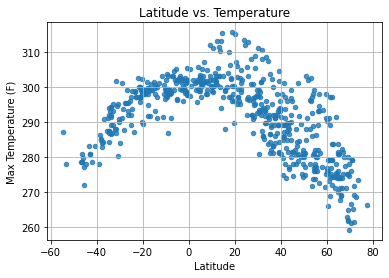

In [9]:
weather_df.plot(x ='Lat', y='Max Temp', kind = 'scatter', grid = True, alpha = .8)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

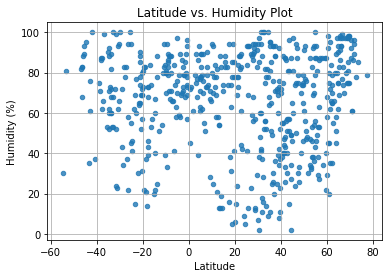

In [10]:
weather_df.plot(x ='Lat', y='Humidity', kind = 'scatter', grid = True, alpha = .8)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

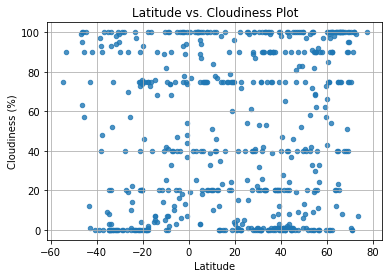

In [11]:
weather_df.plot(x ='Lat', y='Cloudiness', kind = 'scatter', grid = True, alpha = .8)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

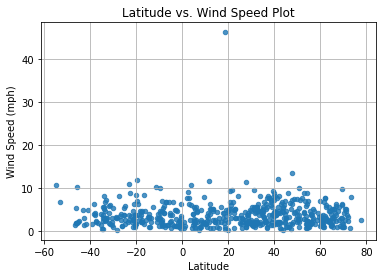

In [12]:
weather_df.plot(x ='Lat', y='Wind Speed', kind = 'scatter', grid = True, alpha = .8)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [13]:
n_hem = weather_df.loc[weather_df["Lat"] >= 0, 'Lat']
s_hem = weather_df.loc[weather_df["Lat"] < 0, 'Lat']
n_hem_temp =  weather_df.loc[weather_df["Lat"] >= 0,'Max Temp']
s_hem_temp =  weather_df.loc[weather_df["Lat"] < 0,'Max Temp']
n_hem_hum =  weather_df.loc[weather_df["Lat"] >= 0,'Humidity']
s_hem_hum =  weather_df.loc[weather_df["Lat"] < 0,'Humidity']
n_hem_cloud =  weather_df.loc[weather_df["Lat"] >= 0,'Cloudiness']
s_hem_cloud =  weather_df.loc[weather_df["Lat"] < 0,'Cloudiness']
n_hem_wind =  weather_df.loc[weather_df["Lat"] >= 0,'Wind Speed']
s_hem_wind =  weather_df.loc[weather_df["Lat"] < 0,'Wind Speed']



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

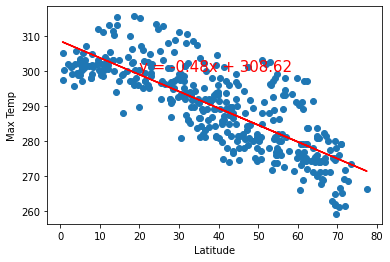

the r-value is -0.7908992979760281


In [14]:
x_values = n_hem
y_values = n_hem_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

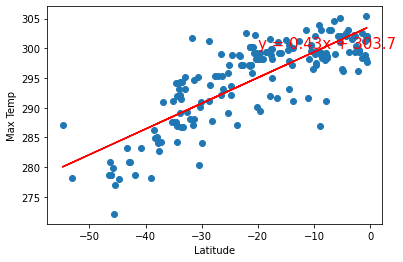

the r-value is 0.8099449128154789


In [15]:
x_values = s_hem
y_values = s_hem_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

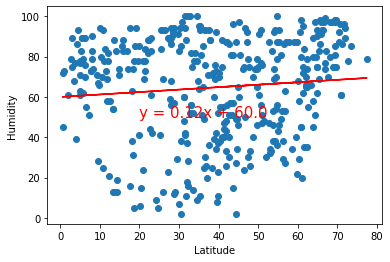

the r-value is 0.09471124519192506


In [16]:
x_values = n_hem
y_values = n_hem_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

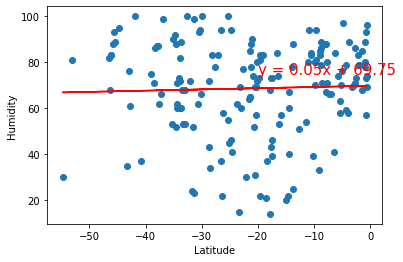

the r-value is 0.03463953906235635


In [17]:
x_values = s_hem
y_values = s_hem_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

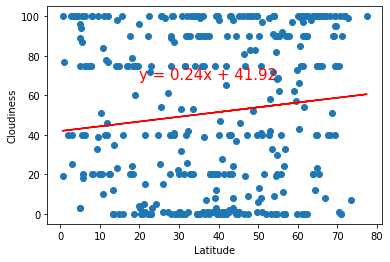

the r-value is 0.12066023746781619


In [18]:
x_values = n_hem
y_values = n_hem_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,68),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

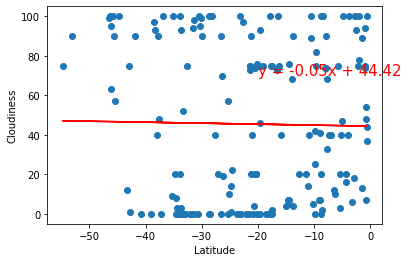

the r-value is -0.01698547744074387


In [19]:
x_values = s_hem
y_values = s_hem_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

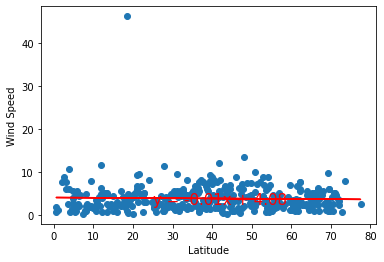

the r-value is -0.034380047528430366


In [20]:
x_values = n_hem
y_values = n_hem_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25, 2.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

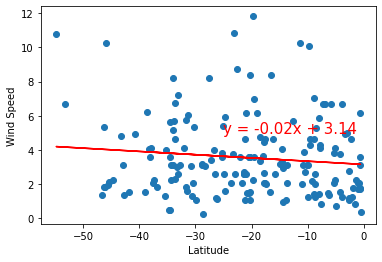

the r-value is -0.11073879629090266


In [21]:
x_values = s_hem
y_values = s_hem_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"the r-value is {rvalue}")